## **Lista de Exercicios**

Utilize os dados para responder as seguintes perguntas de negócio:
<ul>
<li><b>1-</b> Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?<br>
<li><b>2-</b> Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.<br>
<li><b>3-</b> Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras<br>
<li><b>4-</b> Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.<br>
<li><b>5-</b> Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.<br>
<li><b>6-</b> Qual o Total de Vendas Por Segmento e Por Ano?<br>
<li><b>7-</b> Os gestores da empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:<br>&nbsp;&nbsp;&nbsp;&nbsp;Se o Valor_Venda for maior que 1000 recebe 15% de desconto.<br>&nbsp;&nbsp;&nbsp;&nbsp;Se o Valor_Venda for menor que 1000 recebe 10% de desconto.<br>&nbsp;&nbsp;&nbsp;&nbsp;Quantas Vendas Receberiam 15% de Desconto?<br>
<li><b>8-</b> Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?<br>
<li><b>9-</b> Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha<br>
<li><b>10-</b> Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico.<br>
</ul>
<p> Algumas documentações que podem ser úteis para a resolução dos problemas:
<li>https://numpy.org/doc/
<li>https://pandas.pydata.org/docs/
<li>https://matplotlib.org/stable/gallery/color/named_colors.html
<li>https://seaborn.pydata.org/examples/index.html
<li>https://sqlite.org/index.html

#### **Exercicio 1:**

In [411]:
#Imports
import pandas as pd

In [412]:
#Lendo o dataset
df = pd.read_csv("dataset.csv")
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [413]:
#Verificando se há algum valor NAN
df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [414]:
#Verificando apenas a categoria "Office Supplies"
df[df.Categoria == "Office Supplies"].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


In [415]:
#Fazendo um agrupamento da categoria "Office Supplies" por Cidade e Valor_Venda
agrupamentoQuestao1 = df[df["Categoria"] == "Office Supplies"].groupby("Cidade")[["Valor_Venda"]].sum()
#Obtendo o valor máximo
resultadoQuestao1 = pd.DataFrame({"Cidade": agrupamentoQuestao1.idxmax(), "Valor_Venda": agrupamentoQuestao1.max()})
resultadoQuestao1

,Cidade,Valor_Venda
Valor_Venda,New York City,68362.814


#### **Exercicio 2:**

>Como a pergunta de négocio foi ambígua, realizei tanto o valor total de vendas por datas quanto a quantidade de vendas nas datas. Para distinção rápida, **azul claro** indica **quantidade total de vendas**, enquanto **verde** indica o **valor total**.

In [416]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [417]:
#Descrevendo a coluna data
df["Data_Pedido"].describe()

count           9700
unique          1226
top       05/09/2017
freq              38
Name: Data_Pedido, dtype: object

In [418]:
df["Data_Pedido"].str.split("/").str[1,2].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Data_Pedido, dtype: float64

In [419]:
#Transformando a coluna de datas no formato de datas do pandas para facilitar o tratamento dos dados
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], format='%d/%m/%Y')


In [420]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [421]:
#Criando uma nova coluna apenas com o mês e o ano dos pedidos
df['Mes_Ano'] = df['Data_Pedido'].dt.strftime('%m/%Y')


In [422]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes_Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11/2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11/2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06/2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10/2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10/2016


In [423]:
df["Mes_Ano"].describe()

count        9700
unique         48
top       12/2018
freq          454
Name: Mes_Ano, dtype: object

In [424]:
#Contando a frequencia de diferentes valores da coluna "Mes_Ano"
frequenciaExercicio2 = df["Mes_Ano"].value_counts().sort_index()

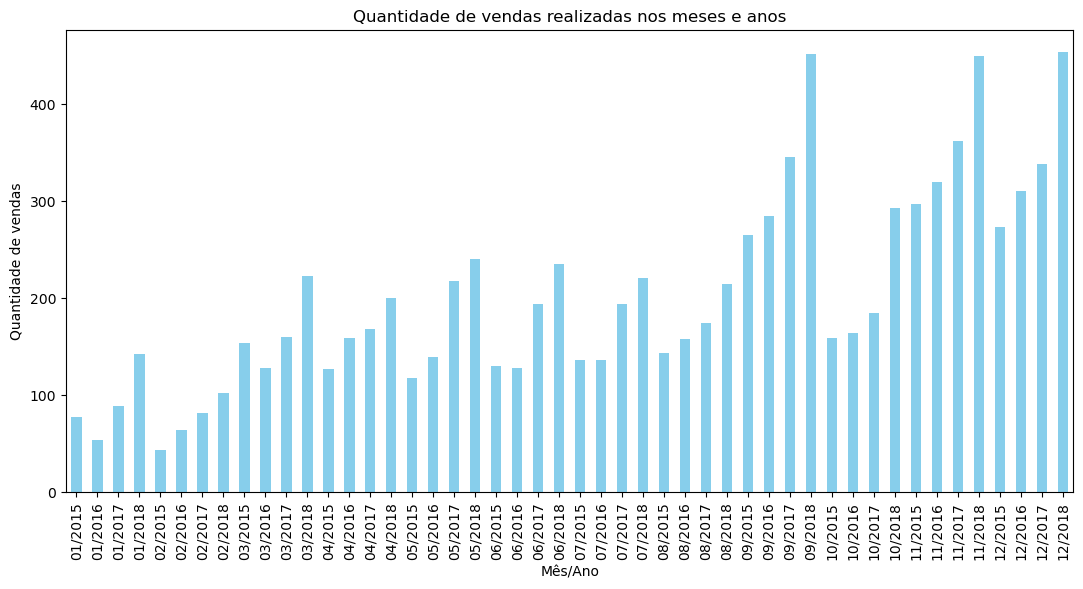

In [425]:
#Criando o gráfico de barras
plt.figure(figsize=(13,6))
frequenciaExercicio2.plot(kind='bar', color='skyblue')
plt.xlabel("Mês/Ano")
plt.ylabel("Quantidade de vendas")
plt.title("Quantidade de vendas realizadas nos meses e anos")
plt.show()

In [426]:
#Criando um agrupamento que soma o valor total das vendas pelos meses
df.groupby('Mes_Ano')['Valor_Venda'].sum().head()

Mes_Ano
01/2015    14205.7070
01/2016    17784.6416
01/2017    18542.4910
01/2018    43207.8980
02/2015     3959.3420
Name: Valor_Venda, dtype: float64

In [427]:
agrupamentoQuestao2 = df.groupby('Mes_Ano')['Valor_Venda'].sum()

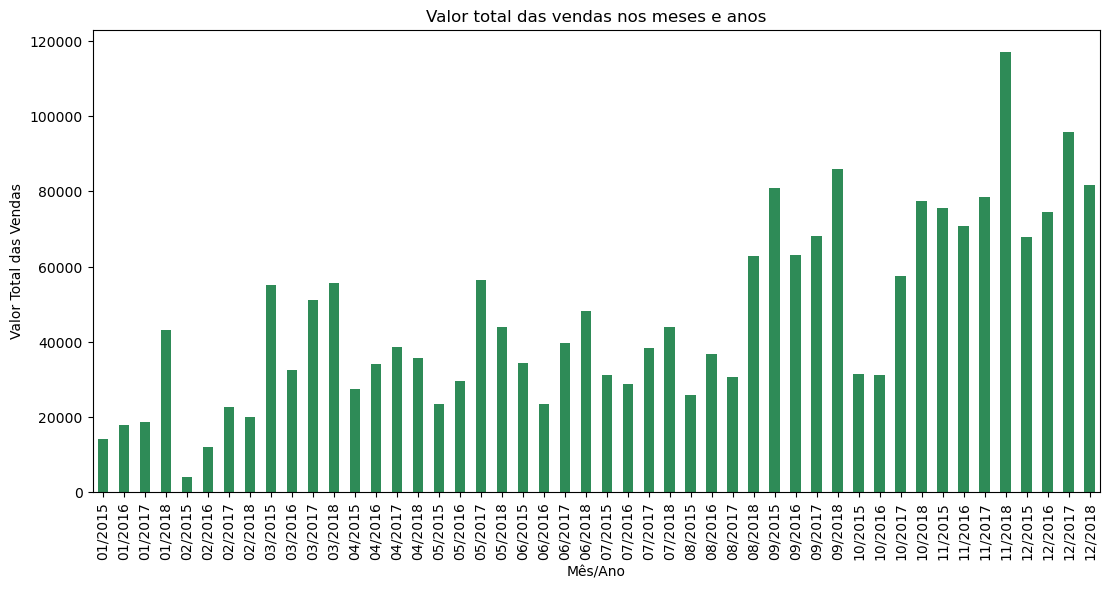

In [428]:
#Criando o gráfico de barras
plt.figure(figsize=(13,6))
agrupamentoQuestao2.plot(kind="bar", color="seagreen")
plt.title("Valor total das vendas nos meses e anos")
plt.xlabel("Mês/Ano")
plt.ylabel("Valor Total das Vendas")
plt.show()

#### **Exercicio 3**

> Assim como a questão anterior, vou fazer nos dois modelos (azul claro para quantidade e verde para valor total)

In [429]:
df["Estado"].describe()

count           9700
unique            49
top       California
freq            1929
Name: Estado, dtype: object

In [430]:
#Cria a frequencia de contagem de Pedidos em cada Estado
frequenciaExercicio3 = df["Estado"].value_counts().sort_index()

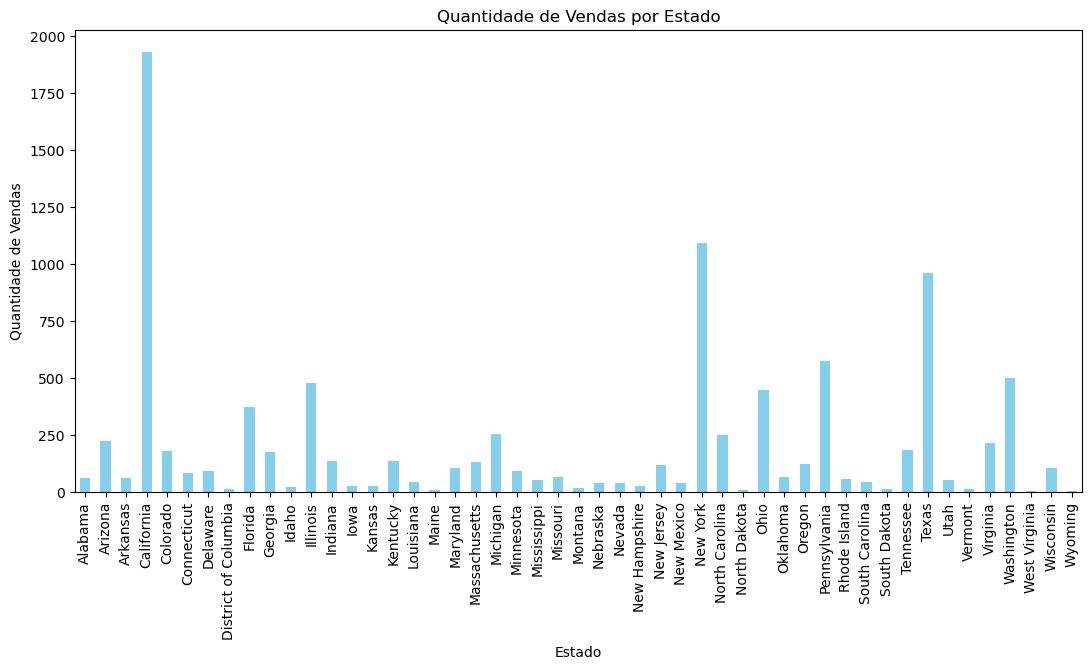

In [431]:
#Cria o gráfico de barras
plt.figure(figsize=(13,6))
frequenciaExercicio3.plot(kind="bar", color= "skyblue")
plt.ylabel("Quantidade de Vendas")
plt.title("Quantidade de Vendas por Estado")
plt.show()

In [432]:
#Cria o agrupamento de Valor_Venda pelo Estado e soma
agrupamentoQuestao3 = df.groupby("Estado")["Valor_Venda"].sum()

In [433]:
agrupamentoQuestao3.head()

Estado
Alabama        19510.6400
Arizona        35272.6570
Arkansas       11673.8300
California    442927.0975
Colorado       31841.5980
Name: Valor_Venda, dtype: float64

Text(0.5, 1.0, 'Valor total de vendas por Estado')

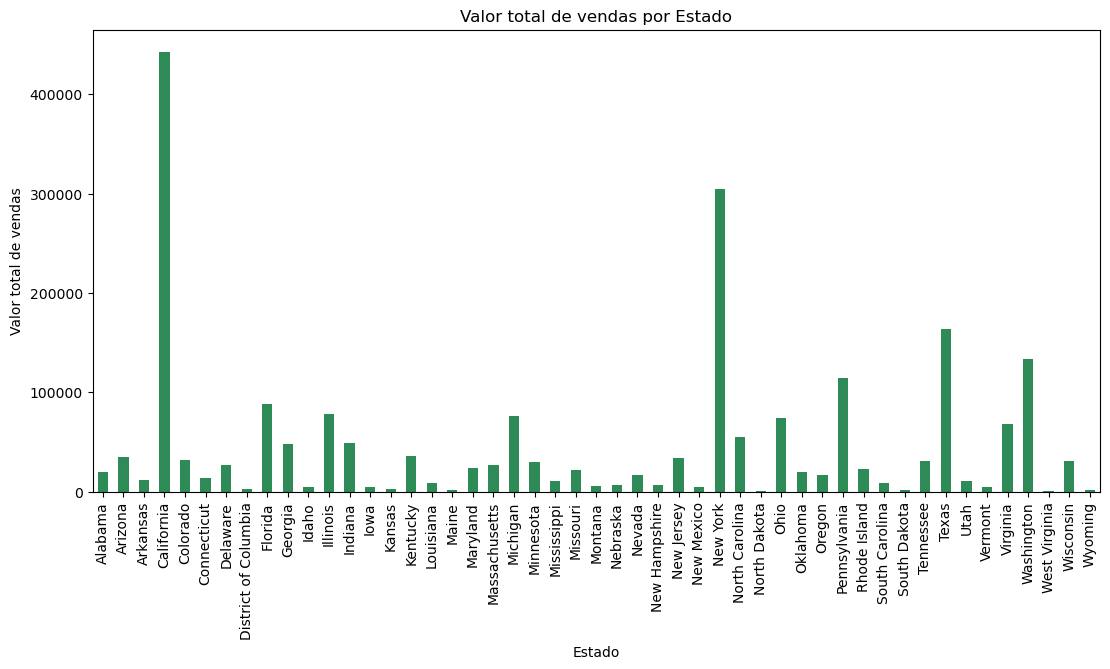

In [434]:
#Criando o gráfico de barras
plt.figure(figsize=(13,6))
agrupamentoQuestao3.plot(kind="bar", color="seagreen")
plt.ylabel("Valor total de vendas")
plt.title("Valor total de vendas por Estado")

#### **Exercicio 4**

>Seguido a mesma instrução dos exercícios anteriores

In [435]:
df[["Cidade", "Valor_Venda"]].head()

,Cidade,Valor_Venda
0,Henderson,261.9600
1,Henderson,731.9400
2,Los Angeles,14.6200
3,Fort Lauderdale,957.5775
4,Fort Lauderdale,22.3680


In [436]:
agrupamentoQuestao4 = df.groupby("Cidade")[["Valor_Venda"]].sum()

In [437]:
agrupamentoQuestao4.head()

,Valor_Venda
Cidade,
Aberdeen,25.500
Abilene,1.392
Akron,2724.244
Albuquerque,2220.160
Alexandria,5519.570


In [438]:
#Conseguindo os 10 maiores valores
questao4top10vendas = agrupamentoQuestao4.nlargest(10, "Valor_Venda")

<Figure size 1300x600 with 0 Axes>

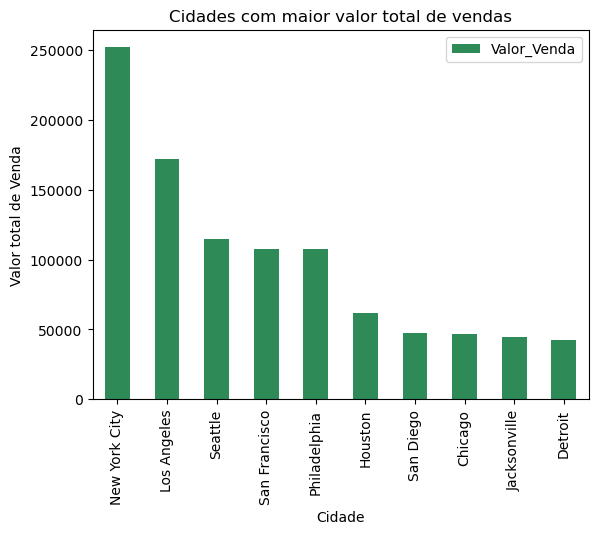

In [439]:
plt.figure(figsize=(13,6))
questao4top10vendas.plot(kind="bar", color = "seagreen")
plt.title("Cidades com maior valor total de vendas")
plt.ylabel("Valor total de Venda")
plt.show()


In [440]:
frequenciaExercicio4 = df["Cidade"].value_counts().sort_index()

In [441]:
frequenciaExercicio4.nlargest(10)

Cidade
New York City    888
Los Angeles      716
Philadelphia     524
San Francisco    496
Seattle          420
Houston          364
Chicago          303
Columbus         218
San Diego        169
Springfield      161
Name: count, dtype: int64

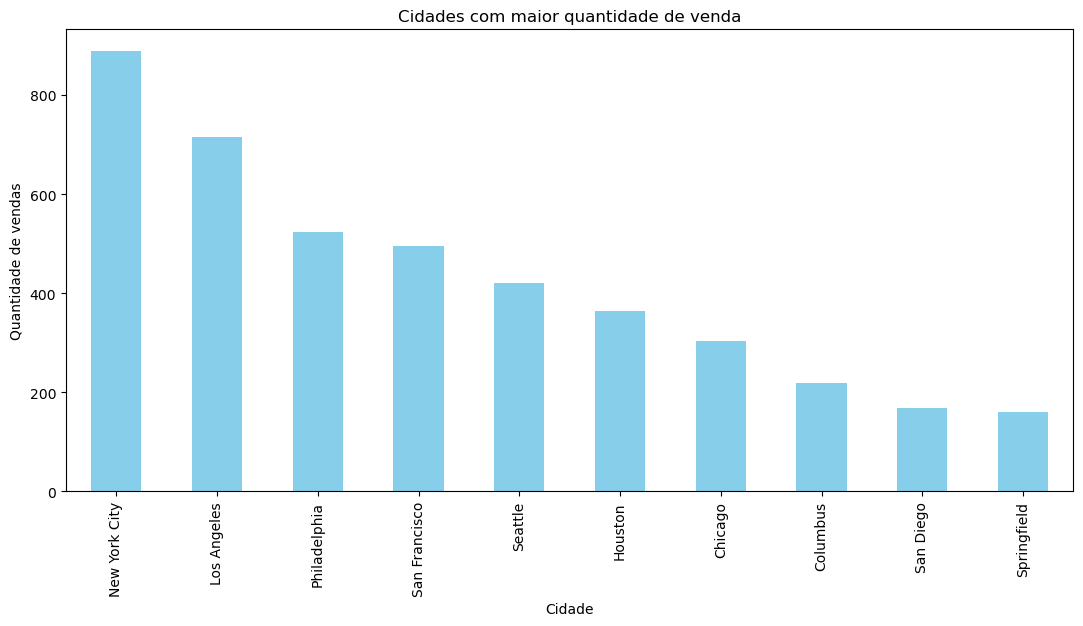

In [442]:
plt.figure(figsize=(13,6))
frequenciaExercicio4.nlargest(10).plot(kind="bar", color= "skyblue")
plt.title("Cidades com maior quantidade de venda")
plt.ylabel("Quantidade de vendas")
plt.show()

#### **Exercicio 5**

In [443]:
df["Segmento"].describe()

count         9700
unique           3
top       Consumer
freq          5039
Name: Segmento, dtype: object

In [444]:
frequenciaExercicio5 = df["Segmento"].value_counts().sort_index()

Text(0.5, 1.0, 'Quantidade de vendas por Segmento')

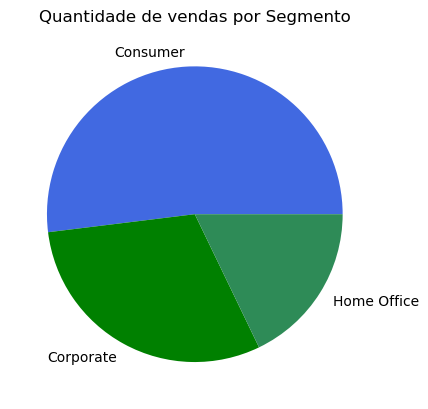

In [445]:
#Criando um gráfico de pizza
frequenciaExercicio5.plot(kind="pie", colors = ["royalblue", "green", "seagreen"])
plt.ylabel("")
plt.title("Quantidade de vendas por Segmento")

In [446]:
agrupamentoQuestao5 = df.groupby("Segmento")[["Valor_Venda"]].sum()

In [447]:
agrupamentoQuestao5.head()

,Valor_Venda
Segmento,
Consumer,1.133834e+06
Corporate,6.792322e+05
Home Office,4.224914e+05


Text(0.5, 1.0, 'Valor total das vendas por segmento')

<Figure size 1300x600 with 0 Axes>

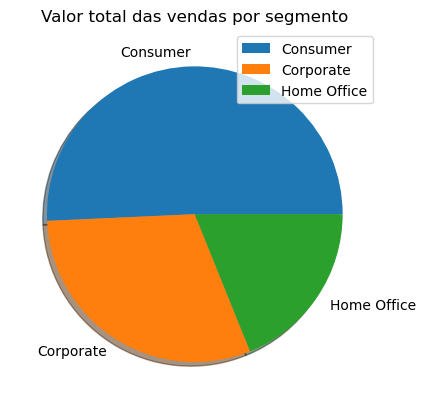

In [448]:
plt.figure(figsize=(13,6))
agrupamentoQuestao5.plot(kind="pie", y="Valor_Venda", shadow=True, ylabel="")
plt.title("Valor total das vendas por segmento")

#### **Exercicio 6**

In [449]:
import numpy as np

In [450]:
df["Ano"]= df['Data_Pedido'].dt.strftime('%Y')

In [451]:
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes_Ano,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11/2017,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11/2017,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06/2017,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10/2016,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10/2016,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,12/2018,2018
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,12/2018,2018
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,12/2018,2018
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,10/2017,2017


In [452]:
#Faz o agrupamento da soma dos valores e faz pivot do novo dataframe, criando um novo nível das colunas
agrupamentoQuestao6 = df.groupby(["Ano", "Segmento"])[["Valor_Venda"]].sum().unstack(fill_value=0)

In [453]:
agrupamentoQuestao6.head()

Valor_Venda                          
Segmento     Consumer    Corporate  Home Office
Ano                                            
2015      256719.9166  125819.5957   88229.0878
2016      265295.2593  114643.1229   74134.1332
2017      288459.5572  203266.7398  103639.6270
2018      323359.6019  235502.7284  156488.5849

<Figure size 1300x600 with 0 Axes>

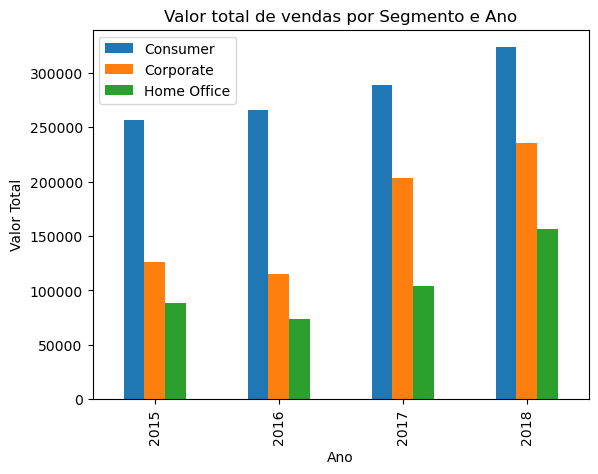

In [454]:
plt.figure(figsize=(13,6))
agrupamentoQuestao6.plot(kind="bar")
plt.ylabel("Valor Total")
plt.title("Valor total de vendas por Segmento e Ano")
plt.legend(["Consumer", "Corporate", "Home Office"])
plt.show()

In [455]:
frequenciaExercicio6 = df[["Ano", "Segmento"]].value_counts().sort_index().unstack()

<Figure size 1300x600 with 0 Axes>

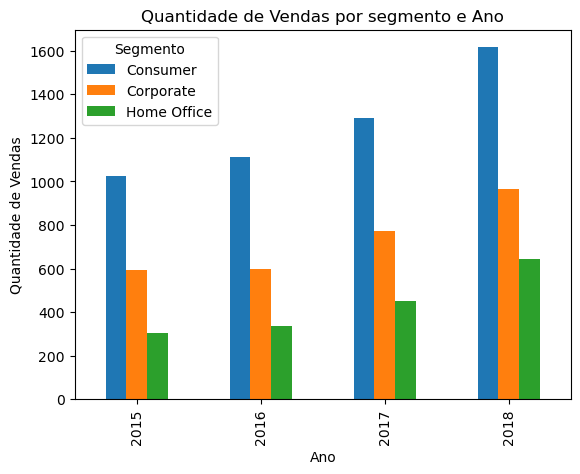

In [456]:
plt.figure(figsize=(13,6))
frequenciaExercicio6.plot(kind="bar")
plt.ylabel("Quantidade de Vendas")
plt.title("Quantidade de Vendas por segmento e Ano")
plt.show()

#### **Exercicio 7**

Os gestores da empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:<br>&nbsp;&nbsp;&nbsp;&nbsp;Se o Valor_Venda for maior que 1000 recebe 15% de desconto.<br>&nbsp;&nbsp;&nbsp;&nbsp;Se o Valor_Venda for menor que 1000 recebe 10% de desconto.<br>&nbsp;&nbsp;&nbsp;&nbsp;Quantas Vendas Receberiam 15% de Desconto?<br>

In [457]:
df["Valor_Venda"].head()

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Valor_Venda, dtype: float64

In [458]:
df["Valor_Venda"].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [459]:
#Função para aplicar o desconto variado no valor
def aplicaDesconto(num):
    if num >= 1000:
        return num * 0.85
    else:
        return num

In [460]:
df["Venda_Desconto"] = df["Valor_Venda"].apply(aplicaDesconto)

In [461]:
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes_Ano,Ano,Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11/2017,2017,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11/2017,2017,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06/2017,2017,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10/2016,2016,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10/2016,2016,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,12/2018,2018,22.8300
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,12/2018,2018,54.3200
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,12/2018,2018,196.7760
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,10/2017,2017,3.6200


In [462]:
agrupamentoQuestao7 = df.groupby('Mes_Ano')[['Venda_Desconto']].sum()

In [463]:
agrupamentoQuestao7.head()

,Venda_Desconto
Mes_Ano,
01/2015,13460.56550
01/2016,15897.63536
01/2017,17275.37110
01/2018,39355.37420
02/2015,3770.90900


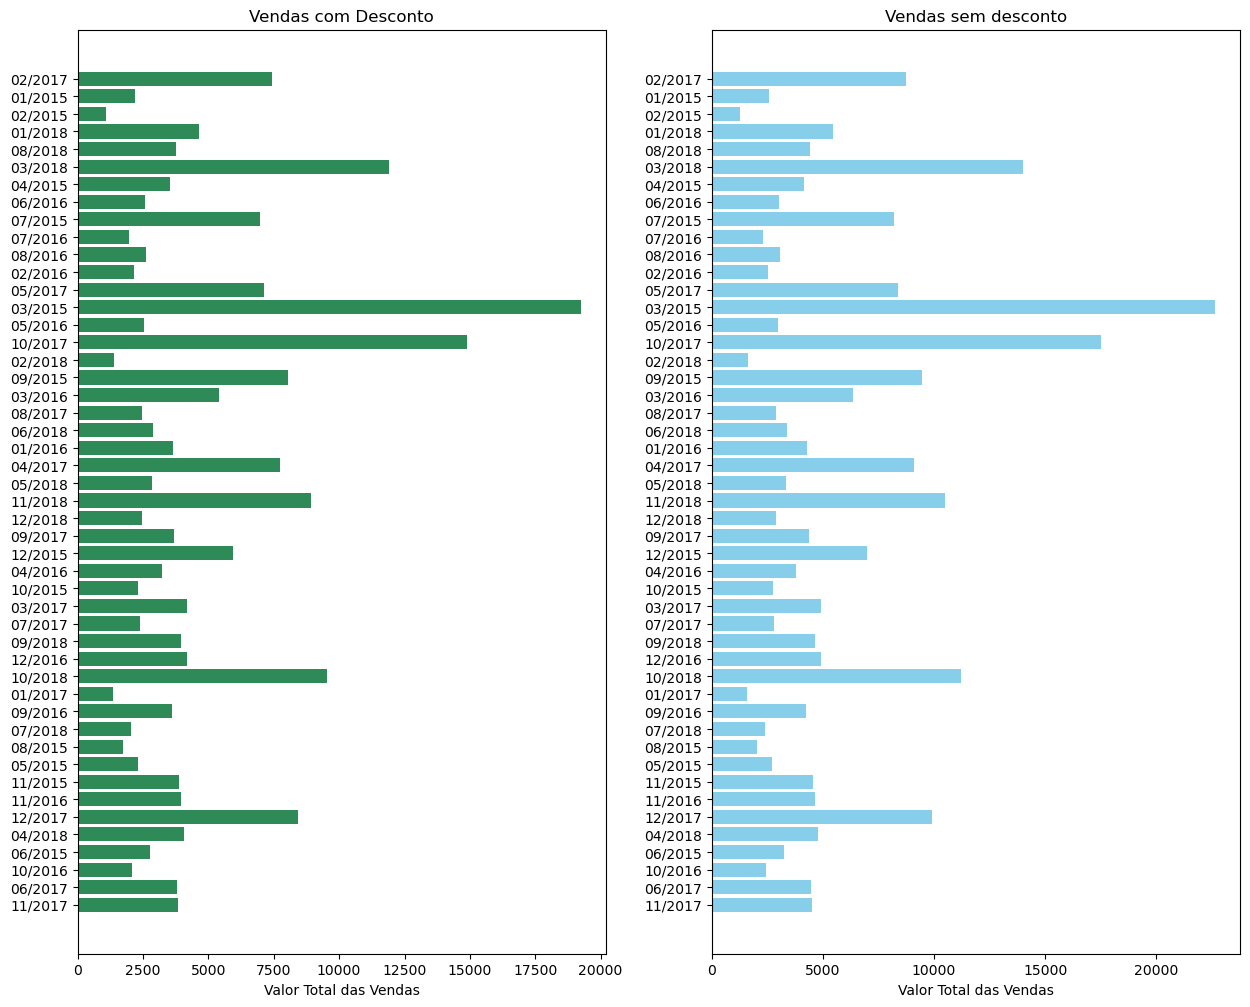

In [464]:
fig, axes = plt.subplots(1, 2, figsize=(15,12))
axes[0].barh(df["Mes_Ano"], df["Venda_Desconto"], color = "seagreen")
axes[0].set_title("Vendas com Desconto")
axes[0].set_xlabel("Valor Total das Vendas")
axes[1].barh(df["Mes_Ano"], df["Valor_Venda"], color = "skyblue")
axes[1].set_title("Vendas sem desconto")
axes[1].set_xlabel("Valor Total das Vendas")

plt.show()

In [465]:
df["Diferenca_Desconto"] = df["Valor_Venda"] - df["Venda_Desconto"]

In [466]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes_Ano,Ano,Venda_Desconto,Diferenca_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11/2017,2017,261.9600,0.0
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11/2017,2017,731.9400,0.0
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06/2017,2017,14.6200,0.0
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10/2016,2016,957.5775,0.0
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10/2016,2016,22.3680,0.0


Text(0.5, 1.0, 'Desconto total aplicado nos meses')

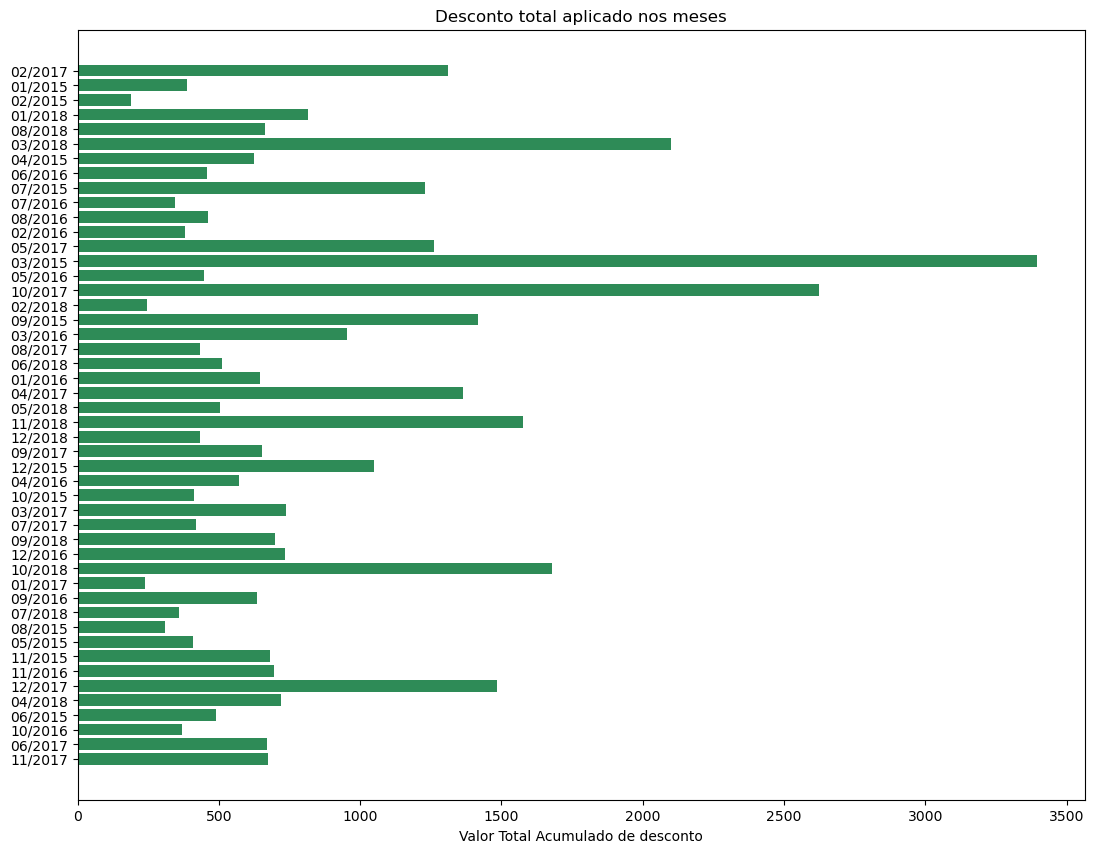

In [467]:
plt.figure(figsize=(13,10))
plt.barh(df["Mes_Ano"], df["Diferenca_Desconto"], color = "seagreen")
plt.xlabel("Valor Total Acumulado de desconto")
plt.title("Desconto total aplicado nos meses")

In [468]:
def verificaDesconto(row):
    num1 = row['Valor_Venda']
    num2 = row['Venda_Desconto']
    
    if num1 == num2:
        return 0
    else:
        return 1

In [469]:
df["Desconto_Aplicado"] = df.apply(verificaDesconto, axis=1)

In [470]:
frequenciaExercicio7 = df["Desconto_Aplicado"].value_counts().sort_index()

In [471]:
frequenciaExercicio7

Desconto_Aplicado
0    9243
1     457
Name: count, dtype: int64

Text(0.5, 1.0, 'Quantidade de descontos aplicados (15%)')

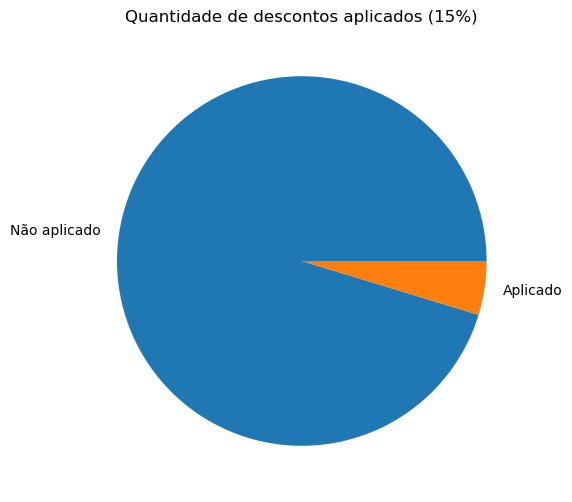

In [472]:
plt.figure(figsize=(13,6))
frequenciaExercicio7.plot(kind="pie", labels = ["Não aplicado", "Aplicado"])
plt.ylabel("")
plt.title("Quantidade de descontos aplicados (15%)")

In [473]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes_Ano,Ano,Venda_Desconto,Diferenca_Desconto,Desconto_Aplicado
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11/2017,2017,261.9600,0.0,0
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11/2017,2017,731.9400,0.0,0
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06/2017,2017,14.6200,0.0,0
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10/2016,2016,957.5775,0.0,0
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10/2016,2016,22.3680,0.0,0


In [474]:
def aplicadesconto10(num):
    if num < 1000:
        return num * 0.9
    else:
        return num

In [475]:
df["Venda_Desconto10%"] = df["Valor_Venda"].apply(aplicadesconto10)

In [476]:
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes_Ano,Ano,Venda_Desconto,Diferenca_Desconto,Desconto_Aplicado,Venda_Desconto10%
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11/2017,2017,261.9600,0.0,0,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11/2017,2017,731.9400,0.0,0,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06/2017,2017,14.6200,0.0,0,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10/2016,2016,957.5775,0.0,0,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10/2016,2016,22.3680,0.0,0,20.13120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,12/2018,2018,22.8300,0.0,0,20.54700
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,12/2018,2018,54.3200,0.0,0,48.88800
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,12/2018,2018,196.7760,0.0,0,177.09840
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,10/2017,2017,3.6200,0.0,0,3.25800


Text(0.5, 0, 'Valor Total das Vendas')

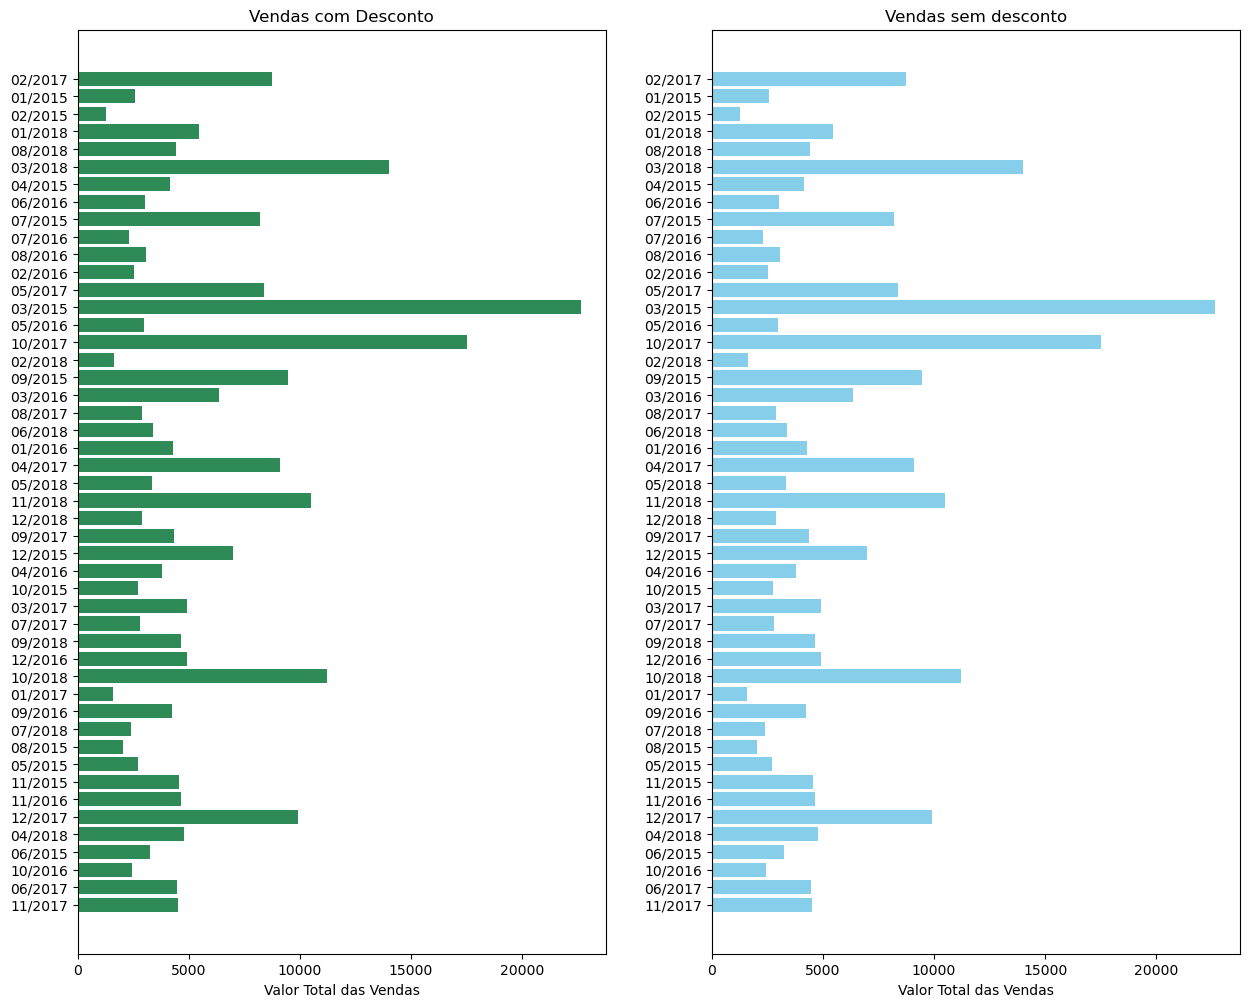

In [477]:
fig, axes = plt.subplots(1, 2, figsize=(15,12))
axes[0].barh(df["Mes_Ano"], df["Venda_Desconto10%"], color = "seagreen")
axes[0].set_title("Vendas com Desconto")
axes[0].set_xlabel("Valor Total das Vendas")
axes[1].barh(df["Mes_Ano"], df["Valor_Venda"], color = "skyblue")
axes[1].set_title("Vendas sem desconto")
axes[1].set_xlabel("Valor Total das Vendas")

In [478]:
df["Diferenca_Desconto10%"] = df["Valor_Venda"] - df["Venda_Desconto10%"]

In [479]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes_Ano,Ano,Venda_Desconto,Diferenca_Desconto,Desconto_Aplicado,Venda_Desconto10%,Diferenca_Desconto10%
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11/2017,2017,261.9600,0.0,0,235.76400,26.19600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11/2017,2017,731.9400,0.0,0,658.74600,73.19400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06/2017,2017,14.6200,0.0,0,13.15800,1.46200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10/2016,2016,957.5775,0.0,0,861.81975,95.75775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10/2016,2016,22.3680,0.0,0,20.13120,2.23680


Text(0.5, 1.0, 'Total de Desconto aplicado em compras com valor abaixo de 1000')

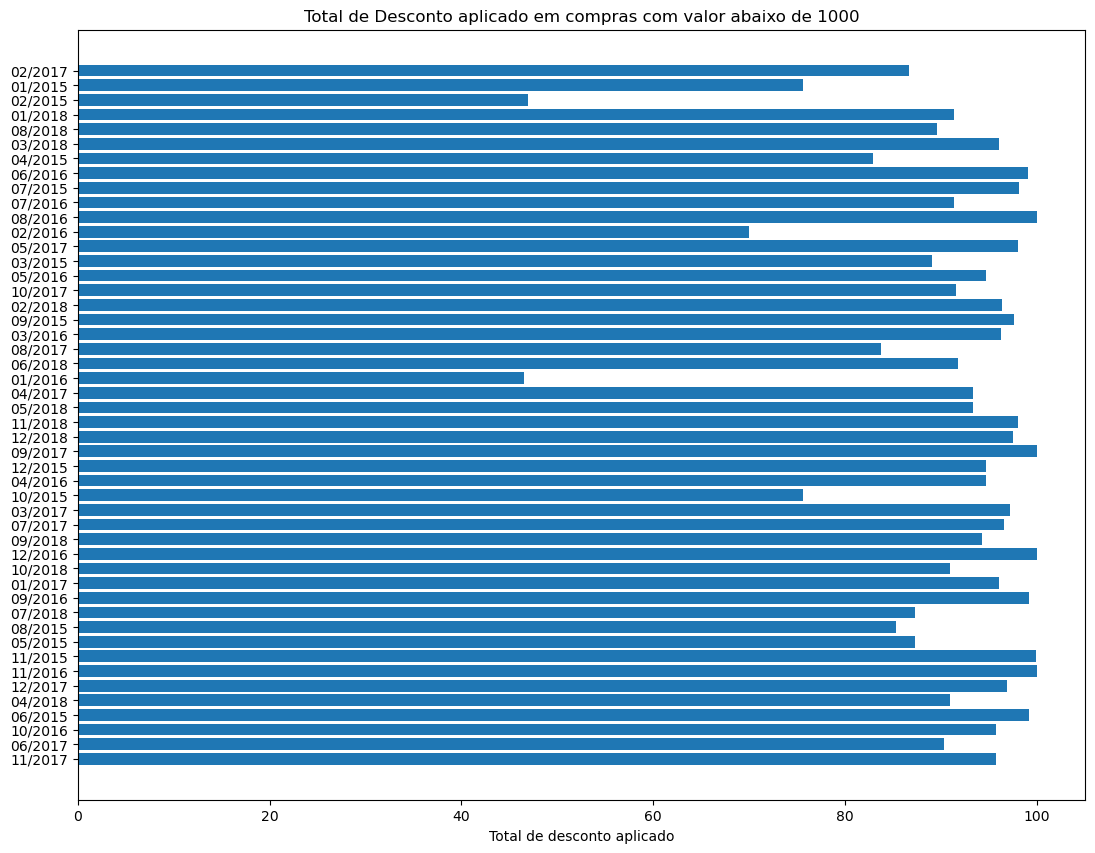

In [480]:
plt.figure(figsize=(13,10))
plt.barh(df["Mes_Ano"], df["Diferenca_Desconto10%"])
plt.xlabel("Total de desconto aplicado")
plt.title("Total de Desconto aplicado em compras com valor abaixo de 1000")

#### **Exercicio 8** 

In [481]:
df["Valor_Venda"].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [482]:
df["Venda_Desconto"].describe()

count     9700.000000
mean       215.510390
std        539.947791
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      19242.708000
Name: Venda_Desconto, dtype: float64

In [483]:
df["Valor_Venda"].mean()

230.4698922371134

In [484]:
df["Venda_Desconto"].mean()

215.51038958350514

([<matplotlib.patches.Wedge at 0x26f2dfe6f90>,
 [Text(0.05793131416825626, 1.098473469337671, 'Média de venda com Desconto'),
  Text(-0.057931314168255914, -1.098473469337671, 'Média de venda sem desconto')])

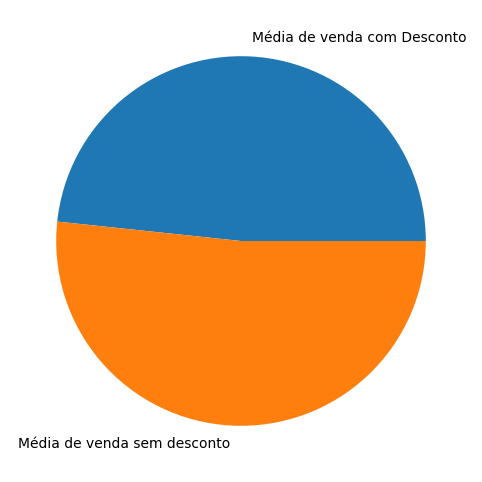

In [485]:
plt.figure(figsize=(13,6))
plt.pie([df["Venda_Desconto"].mean(), df["Valor_Venda"].mean()], labels=["Média de venda com Desconto", "Média de venda sem desconto"])

#### **Exercicio 9**

Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha

In [486]:
agrupamento1Questao9 = df.groupby("Segmento")[["Valor_Venda"]].mean()

In [487]:
agrupamento1Questao9.head()

,Valor_Venda
Segmento,
Consumer,225.011775
Corporate,231.819859
Home Office,244.073618


Text(0.5, 1.0, 'Media de Valor das Vendas por segmento')

<Figure size 1300x600 with 0 Axes>

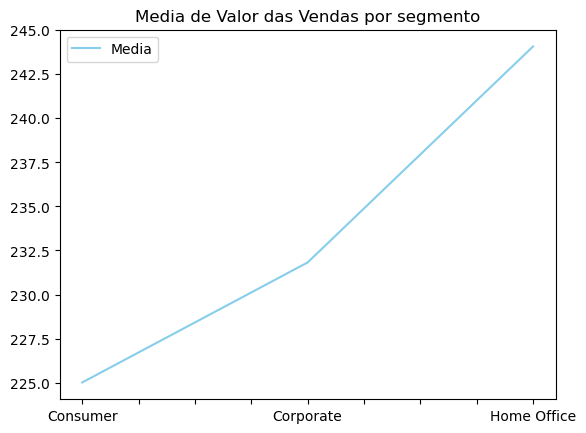

In [488]:
plt.figure(figsize=(13,6))
agrupamento1Questao9.plot(kind="line", color="skyblue", xlabel="")
plt.legend(["Media"])
plt.title("Media de Valor das Vendas por segmento")

In [489]:
agrupamento2Questao9 = df.groupby("Ano")[["Valor_Venda"]].mean()

In [490]:
agrupamento2Questao9.head()

,Valor_Venda
Ano,
2015,245.064342
2016,222.148980
2017,237.292118
2018,221.745479


Text(0.5, 1.0, 'Media de Valor das Vendas por ano')

<Figure size 1300x600 with 0 Axes>

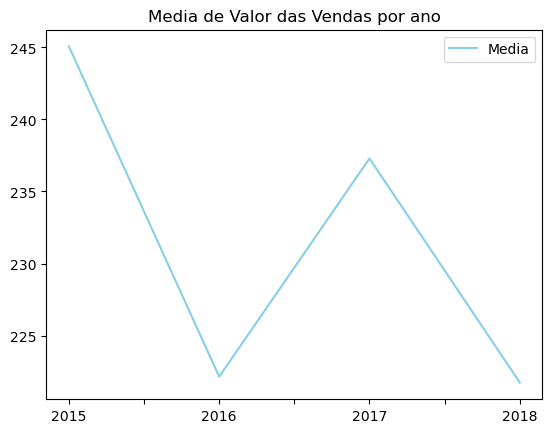

In [491]:
plt.figure(figsize=(13,6))
agrupamento2Questao9.plot(kind="line", color="skyblue", xlabel="")
plt.legend(["Media"])
plt.title("Media de Valor das Vendas por ano")

In [492]:
df["Mes"]= df['Data_Pedido'].dt.strftime('%m')

In [493]:
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes_Ano,Ano,Venda_Desconto,Diferenca_Desconto,Desconto_Aplicado,Venda_Desconto10%,Diferenca_Desconto10%,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11/2017,2017,261.9600,0.0,0,235.76400,26.19600,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11/2017,2017,731.9400,0.0,0,658.74600,73.19400,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06/2017,2017,14.6200,0.0,0,13.15800,1.46200,06
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10/2016,2016,957.5775,0.0,0,861.81975,95.75775,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10/2016,2016,22.3680,0.0,0,20.13120,2.23680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,12/2018,2018,22.8300,0.0,0,20.54700,2.28300,12
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,12/2018,2018,54.3200,0.0,0,48.88800,5.43200,12
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,12/2018,2018,196.7760,0.0,0,177.09840,19.67760,12
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,10/2017,2017,3.6200,0.0,0,3.25800,0.36200,10


In [494]:
agrupamento3Questao9 = df.groupby("Mes")[["Valor_Venda"]].mean()

In [495]:
agrupamento3Questao9.head()

,Valor_Venda
Mes,
01,259.669633
02,201.297688
03,291.913903
04,207.511879
05,214.563064


Text(0.5, 1.0, 'Media de Valor das Vendas por mês')

<Figure size 1300x600 with 0 Axes>

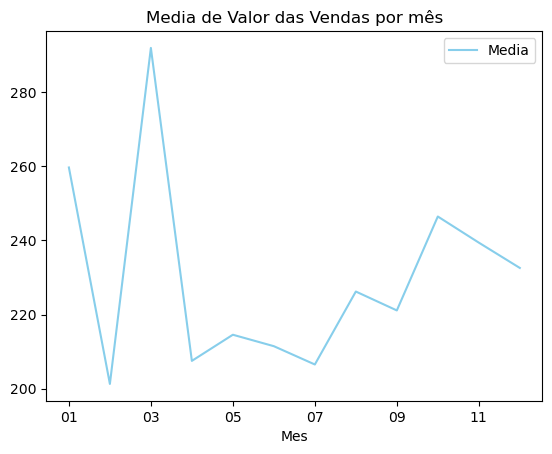

In [496]:
plt.figure(figsize=(13, 6))
agrupamento3Questao9.plot(kind="line", color = "skyblue")
plt.legend(["Media"])
plt.title("Media de Valor das Vendas por mês")

#### **Exercicio 10**

In [497]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes_Ano,Ano,Venda_Desconto,Diferenca_Desconto,Desconto_Aplicado,Venda_Desconto10%,Diferenca_Desconto10%,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11/2017,2017,261.9600,0.0,0,235.76400,26.19600,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11/2017,2017,731.9400,0.0,0,658.74600,73.19400,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06/2017,2017,14.6200,0.0,0,13.15800,1.46200,06
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10/2016,2016,957.5775,0.0,0,861.81975,95.75775,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10/2016,2016,22.3680,0.0,0,20.13120,2.23680,10


In [498]:
agrupamentoQuestao10 = df.groupby(["SubCategoria", "Categoria"])[["Valor_Venda"]].sum().unstack()

In [499]:
agrupamentoQuestao10.head()

Valor_Venda                            
Categoria       Furniture Office Supplies  Technology
SubCategoria                                         
Accessories           NaN             NaN  162791.362
Appliances            NaN      104061.693         NaN
Art                   NaN       26573.736         NaN
Binders               NaN      194723.381         NaN
Bookcases     108045.0467             NaN         NaN

In [500]:
agrupamentoQuestao10.fillna(0)

Valor_Venda                            
Categoria       Furniture Office Supplies  Technology
SubCategoria                                         
Accessories        0.0000           0.000  162791.362
Appliances         0.0000      104061.693       0.000
Art                0.0000       26573.736       0.000
Binders            0.0000      194723.381       0.000
Bookcases     108045.0467           0.000       0.000
Chairs        317919.6250           0.000       0.000
Copiers            0.0000           0.000  146248.094
Envelopes          0.0000       15791.182       0.000
Fasteners          0.0000        3001.960       0.000
Furnishings    88862.7700           0.000       0.000
Labels             0.0000       12267.366       0.000
Machines           0.0000           0.000  189238.631
Paper              0.0000       76312.764       0.000
Phones             0.0000           0.000  325271.294
Storage            0.0000      216188.362       0.000
Supplies           0.0000       46177.328       0.000
Tables        202083.3600           0.000       0.000

<Figure size 1300x600 with 0 Axes>

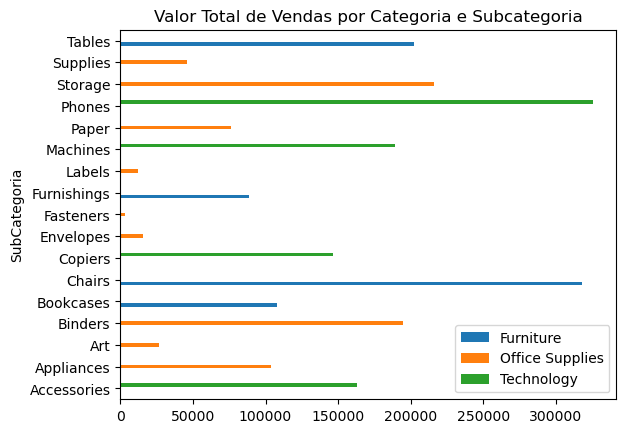

In [501]:
plt.figure(figsize=(13,6))
agrupamentoQuestao10.plot(kind="barh")
plt.title("Valor Total de Vendas por Categoria e Subcategoria")
plt.legend(["Furniture", "Office Supplies", "Technology"])
plt.show()

In [502]:
agrupamentoQuestao10 = df.groupby(["SubCategoria", "Categoria"])[["Valor_Venda"]].sum()

In [503]:
agrupamentoQuestao10

,,Valor_Venda
SubCategoria,Categoria,
Accessories,Technology,162791.3620
Appliances,Office Supplies,104061.6930
Art,Office Supplies,26573.7360
Binders,Office Supplies,194723.3810
Bookcases,Furniture,108045.0467
Chairs,Furniture,317919.6250
Copiers,Technology,146248.0940
Envelopes,Office Supplies,15791.1820
Fasteners,Office Supplies,3001.9600


<Figure size 1300x600 with 0 Axes>

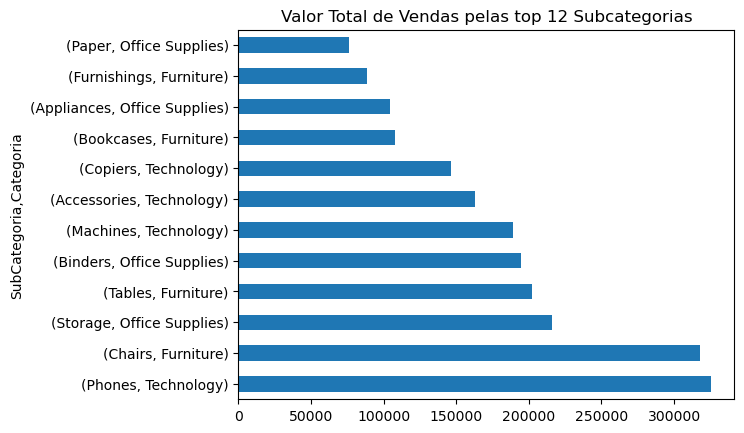

In [504]:
plt.figure(figsize=(13,6))
agrupamentoQuestao10.nlargest(12, "Valor_Venda").plot(kind="barh", legend="")
plt.title("Valor Total de Vendas pelas top 12 Subcategorias")
plt.show()